In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data preprocessing

In [6]:
print('Unique values count\n')
print(df.nunique())

Unique values count

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


In [7]:
# checking for duplicates
df.duplicated().any()

True

In [8]:
# remove the duplicates
df = df.drop_duplicates()
df.shape

(283726, 31)

In [9]:
# statistical measures of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
# Checking for any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Let's see how many are fraudulent and non-fraudulent transactions

In [11]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Class
Not Fraud    283253
Fraud           473
Name: count, dtype: int64


### EDA

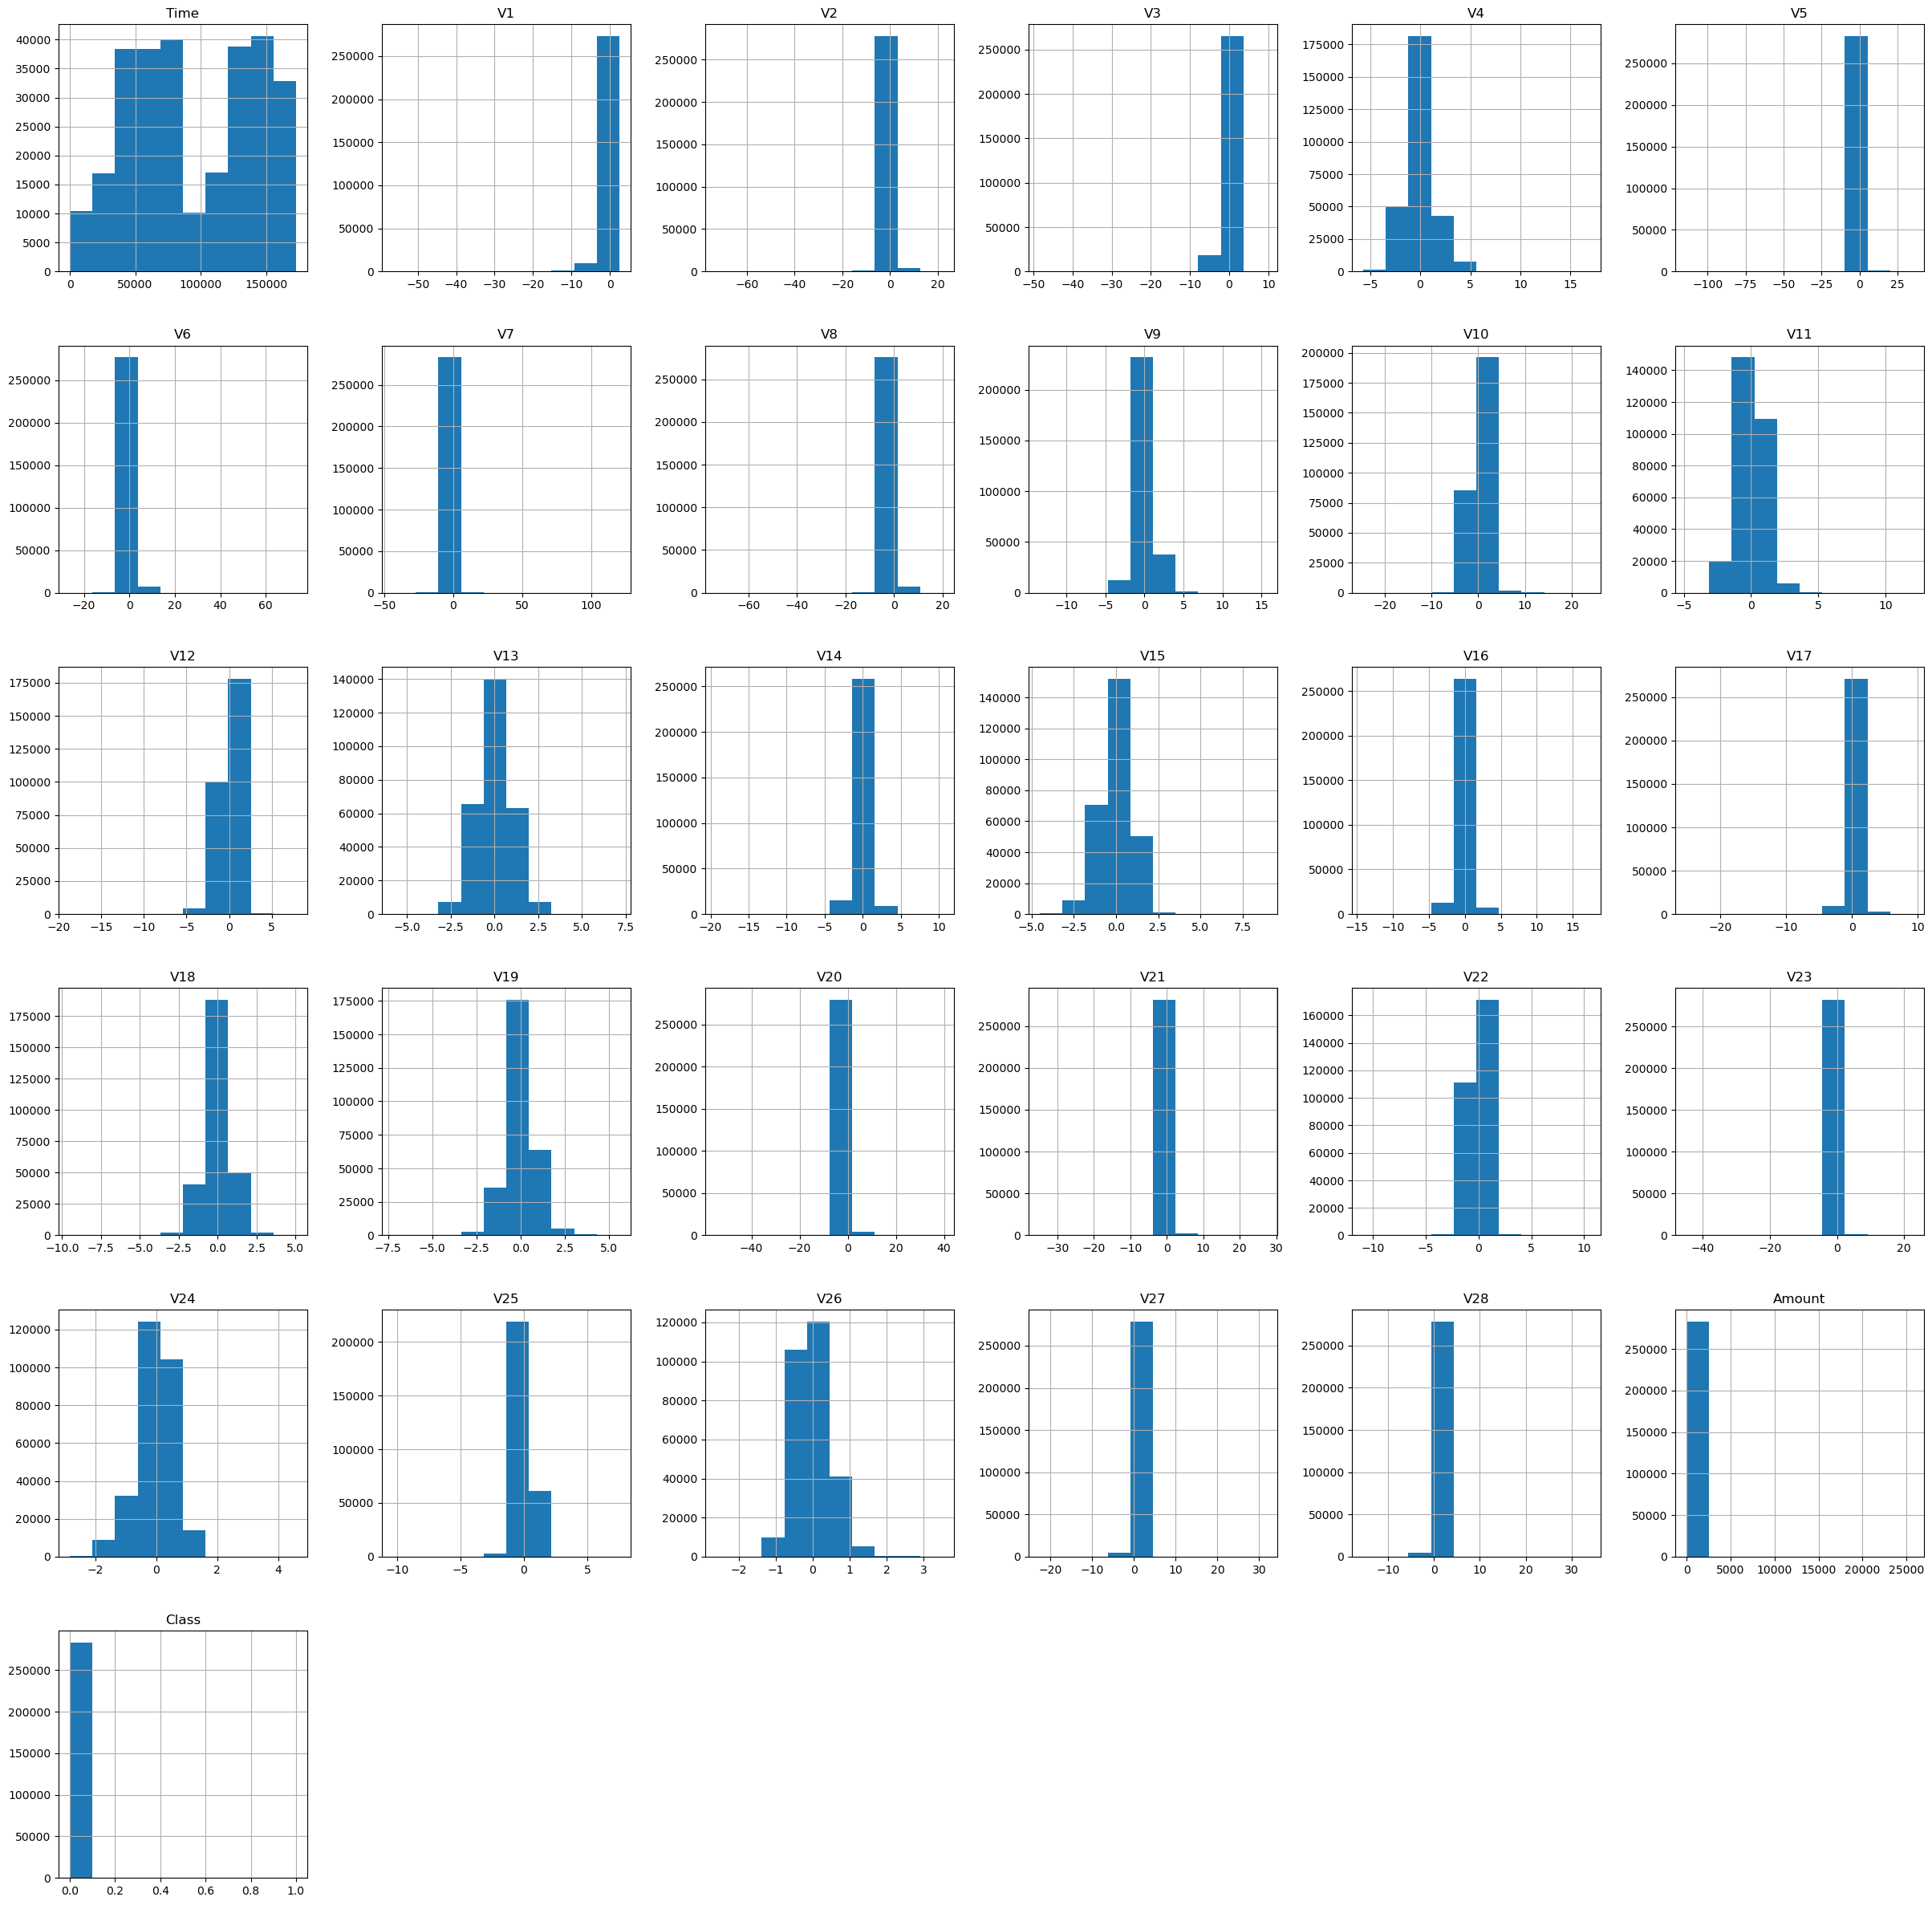

In [12]:
# plot the histogram of each parameter
df.hist(figsize = (30, 30))
plt.show()

##### We can see most of the V's are clustered around 0 with some or no outliers. So we have very few fraudulent cases over valid cases in our class histogram.

<Axes: xlabel='Time', ylabel='Amount'>

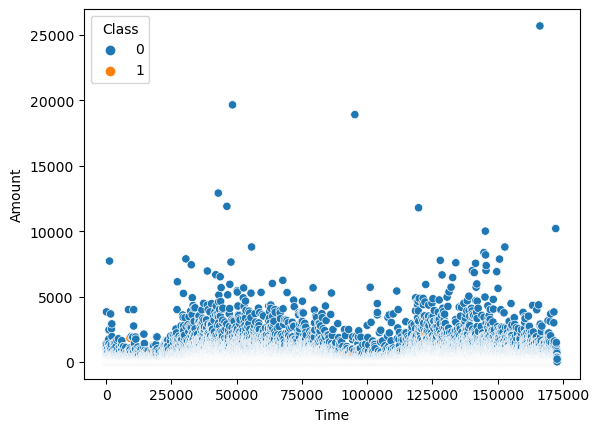

In [13]:
sns.scatterplot(data = df, x = 'Time', y = 'Amount', hue = 'Class')

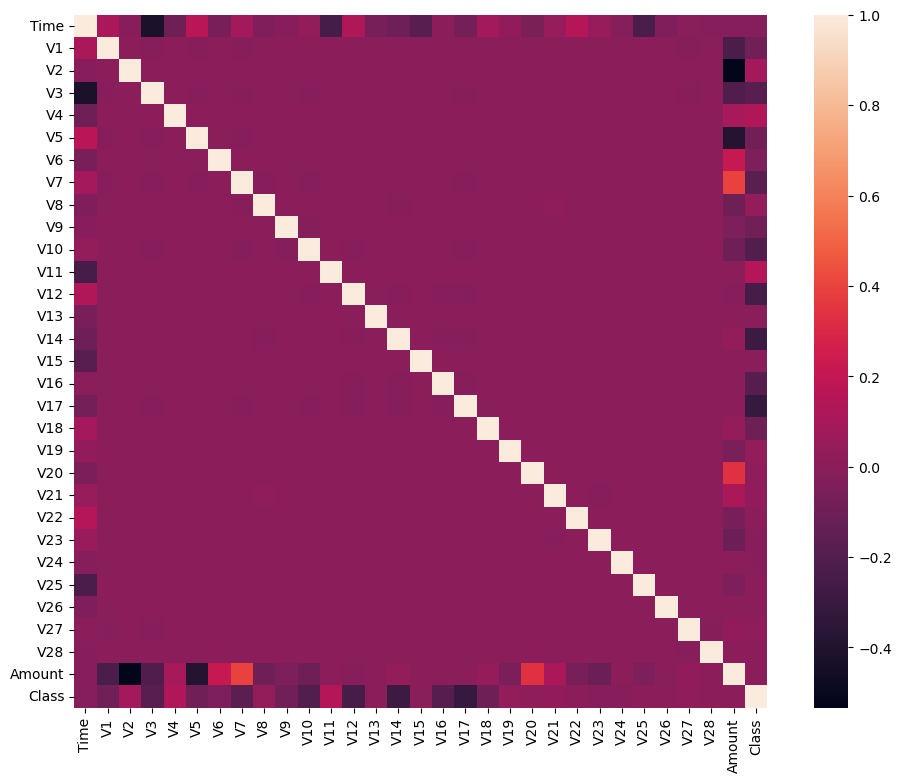

In [14]:
# correlation matrix
fig = plt.figure(figsize = (12, 9))

sns.heatmap(df.corr(), square = True)
plt.show()

In [15]:
# Separating predictor variables and target variable
X = df.drop( columns = 'Class', axis = 1)
y = pd.DataFrame(df['Class'])

In [16]:
# Splitting the data into training/testting dataset
X_train, X_test, y_train, y_test = train_test_split ( X, y, test_size = 0.2, random_state = 42)

In [17]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,57873.0,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,318.00
265736,162025.0,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.32
42801,41251.0,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.99
172689,121201.0,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,6.30
179949,124306.0,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.99


In [18]:
y_train.head()

,Class
79119,0
265736,0
42801,0
172689,0
179949,0


In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_train

array([[3.34928700e-01, 9.35292796e-01, 7.55851861e-01, ...,
        4.13246338e-01, 3.11234961e-01, 1.23777984e-02],
       [9.37688087e-01, 9.57275538e-01, 7.73404862e-01, ...,
        4.14269195e-01, 3.09136014e-01, 1.29694416e-03],
       [2.38732117e-01, 9.52141054e-01, 7.74804418e-01, ...,
        4.17083335e-01, 3.14300406e-01, 7.78088650e-04],
       ...,
       [4.62886013e-01, 9.79687898e-01, 7.66736240e-01, ...,
        4.17358779e-01, 3.13632692e-01, 1.75157525e-04],
       [5.12384833e-01, 9.91980842e-01, 7.65839964e-01, ...,
        4.15188277e-01, 3.11993240e-01, 1.53671535e-03],
       [4.43064494e-01, 9.50391451e-01, 7.75894049e-01, ...,
        4.14095342e-01, 3.12157074e-01, 0.00000000e+00]])

In [22]:
X_test

array([[4.00452567e-01, 9.76206373e-01, 7.59189057e-01, ...,
        4.18393080e-01, 3.13938671e-01, 2.19608612e-03],
       [4.67434835e-01, 8.76660499e-01, 8.13169866e-01, ...,
        4.24481640e-01, 3.04271228e-01, 3.82232643e-04],
       [2.38332793e-01, 9.31964025e-01, 7.64502921e-01, ...,
        4.07240167e-01, 3.08074492e-01, 1.79361306e-03],
       ...,
       [7.32956387e-01, 9.91874540e-01, 7.64011962e-01, ...,
        4.14968051e-01, 3.11923192e-01, 1.28371004e-03],
       [2.82796657e-01, 9.09910093e-01, 7.42610136e-01, ...,
        4.21273288e-01, 3.05844052e-01, 3.57165655e-03],
       [9.31871846e-01, 9.57177385e-01, 7.75512300e-01, ...,
        4.27213353e-01, 3.19525228e-01, 3.69776997e-04]])

### Model Training and Evaluation

In [23]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
y_pred_lr = clf.predict(X_test)
y_proba_lr = clf.predict_proba(X_test)[:, 1]

In [25]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_lr))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.90      0.48      0.62        90

    accuracy                           1.00     56746
   macro avg       0.95      0.74      0.81     56746
weighted avg       1.00      1.00      1.00     56746



In [26]:
# Print ROC-AUC score
print('ROC-AUC score:', roc_auc_score(y_test, y_proba_lr))

ROC-AUC score: 0.9695356380808936


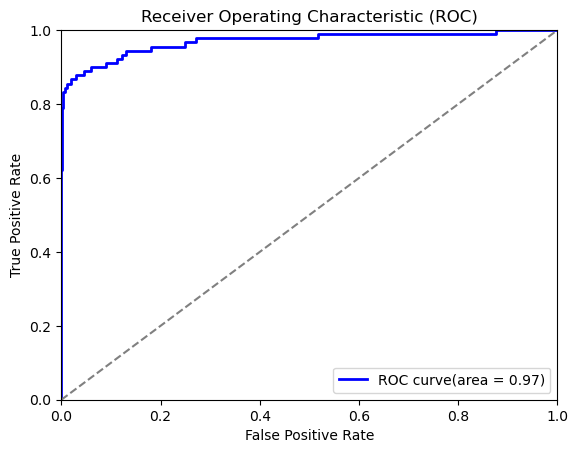

In [27]:
# plotting the ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label= 'ROC curve(area = %0.2f)' % roc_auc_score(y_test, y_proba_lr))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### Random Undersampling

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler(random_state = 42)

In [30]:
# Applying Random Undersampling
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [31]:
X_train.shape

(226980, 30)

In [32]:
X_resampled.shape

(766, 30)

In [33]:
y_train.value_counts()

Class
0        226597
1           383
Name: count, dtype: int64

In [34]:
y_resampled.value_counts()

Class
0        383
1        383
Name: count, dtype: int64

##### Hyperparameter tuning & Model fitting

##### 1. Logistic Regression

In [35]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

lr_grid = GridSearchCV(LogisticRegression(), param_grid_lr, scoring = 'roc_auc', cv=5,n_jobs = -1)
lr_grid.fit(X_resampled, y_resampled)

print(lr_grid.best_params_)

{'C': 10, 'penalty': 'l2'}


C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\line

C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.11      0.86      0.19        90

    accuracy                           0.99     56746
   macro avg       0.55      0.92      0.59     56746
weighted avg       1.00      0.99      0.99     56746

ROC AUC Score (With Under Sampling): 0.971850387523926


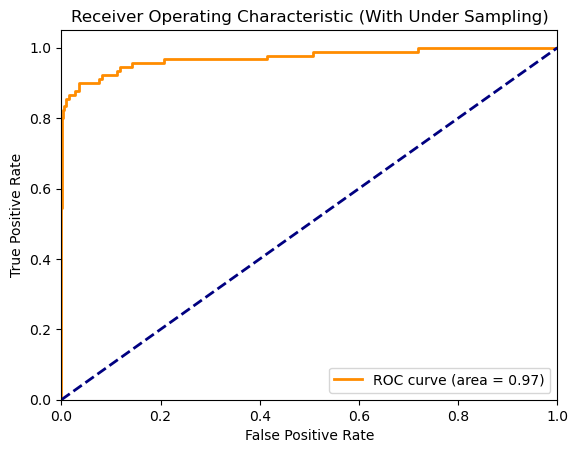

In [36]:
# Model Evaluation Logistic Regression
lr_rus = LogisticRegression(C=10, penalty = 'l2')
lr_rus.fit(X_resampled, y_resampled)

# Predict test set
y_predlr_rus = lr_rus.predict(X_test)
y_probalr_rus = lr_rus.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_predlr_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_probalr_rus))

# Plotting ROC AUC Curve for resampled data
fpr_lr_rus, tpr_lr_rus, _ = roc_curve(y_test, y_probalr_rus)
plt.figure()
plt.plot(fpr_lr_rus, tpr_lr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probalr_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()

##### 2. Random Forest Classifier

In [37]:
# Hyperparameter tuning for Random Forest Classifier
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring = 'roc_auc', cv=5,n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

print(rf_grid.best_params_)

C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


C:\Users\Souridya\AppData\Local\Temp\ipykernel_9320\3487986441.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_rus.fit(X_resampled, y_resampled)


Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.86      0.12        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC Score (With Under Sampling): 0.9766702163544511


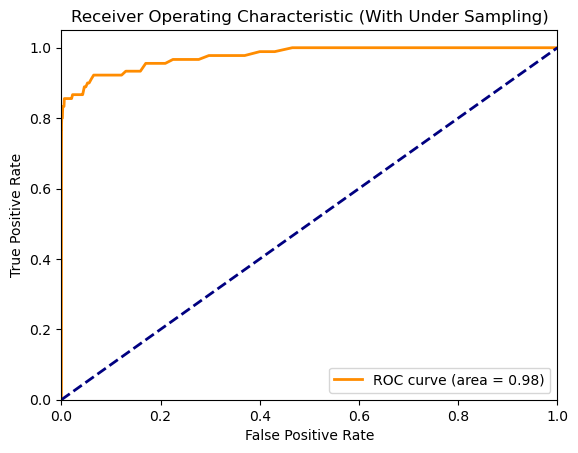

In [38]:
# Model Evaluation Random Forest Classifier
rf_rus = RandomForestClassifier( max_depth = 30, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_rus.fit(X_resampled, y_resampled)

# Predict test set
y_predrf_rus = rf_rus.predict(X_test)
y_probarf_rus = rf_rus.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_predrf_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_probarf_rus))

# Plotting ROC AUC Curve for resampled data
fpr_rf_rus, tpr_rf_rus, _ = roc_curve(y_test, y_probarf_rus)
plt.figure()
plt.plot(fpr_rf_rus, tpr_rf_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probarf_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()

##### 3. XGBoost Classifier

In [39]:
# Hyperparameter tuning for XGBoost Classifier
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(XGBClassifier(), param_grid_xgb, scoring = 'roc_auc', cv=5,n_jobs = -1)
xgb_grid.fit(X_resampled, y_resampled)

print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56656
           1       0.04      0.89      0.08        90

    accuracy                           0.97     56746
   macro avg       0.52      0.93      0.53     56746
weighted avg       1.00      0.97      0.98     56746

ROC AUC Score (With Under Sampling): 0.9659891861997553


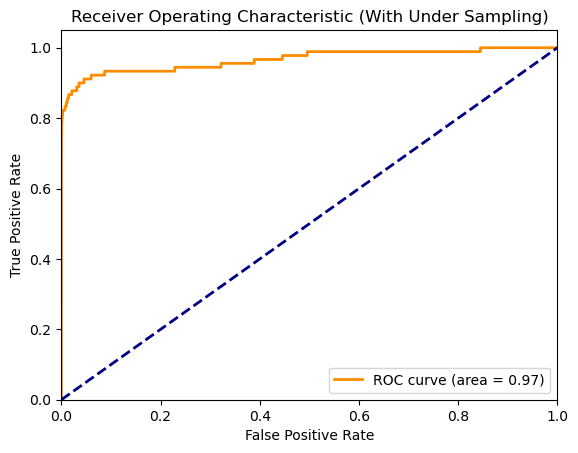

In [40]:
# Model Evaluation with XGBoost Classifier
xgb_rus = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100, subsample = 1.0)
xgb_rus.fit(X_resampled, y_resampled)

# Predict test set
y_predxgb_rus = xgb_rus.predict(X_test)
y_probaxgb_rus = xgb_rus.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_predxgb_rus))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With Under Sampling):", roc_auc_score(y_test, y_probaxgb_rus))

# Plotting ROC AUC Curve for resampled data
fpr_xgb_rus, tpr_xgb_rus, _ = roc_curve(y_test, y_probaxgb_rus)
plt.figure()
plt.plot(fpr_xgb_rus, tpr_xgb_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probaxgb_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Under Sampling)')
plt.legend(loc="lower right")
plt.show()

### SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
# Applying SMOTE
smote = SMOTE(random_state = 42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)


In [43]:
X_train.shape

(226980, 30)

In [44]:
X_resampled_smote.shape

(453194, 30)

In [45]:
y_train.value_counts()

Class
0        226597
1           383
Name: count, dtype: int64

In [46]:
y_resampled_smote.value_counts()

Class
0        226597
1        226597
Name: count, dtype: int64

##### Hyperparameter tuning & Model fitting

##### 1.Logistic Regression 

In [47]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr_smote = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

lr_grid_smote = GridSearchCV(LogisticRegression(), param_grid_lr_smote, scoring = 'roc_auc', cv=5,n_jobs = -1)
lr_grid_smote.fit(X_resampled_smote, y_resampled_smote)

print(lr_grid_smote.best_params_)

C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\line

{'C': 10, 'penalty': 'l2'}


C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Souridya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.88      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC Score (With SMOTE): 0.9766230506134488


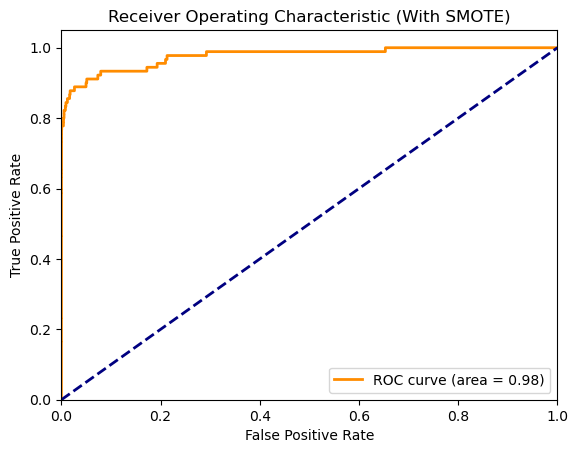

In [48]:
# Model Evaluation Logistic Regression
lr_smote = LogisticRegression(C=10, penalty = 'l2')
lr_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_predlr_smote = lr_smote.predict(X_test)
y_probalr_smote = lr_smote.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_predlr_smote))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_probalr_smote))

# Plotting ROC AUC Curve for resampled data
fpr_lr_smote, tpr_lr_smote, _ = roc_curve(y_test, y_probalr_smote)
plt.figure()
plt.plot(fpr_lr_smote, tpr_lr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probalr_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

##### 2.Random Forest Classifier

C:\Users\Souridya\AppData\Local\Temp\ipykernel_9320\602499328.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_smote.fit(X_resampled_smote, y_resampled_smote)


Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.94      0.80      0.86        90

    accuracy                           1.00     56746
   macro avg       0.97      0.90      0.93     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score (With SMOTE): 0.9639041858859707


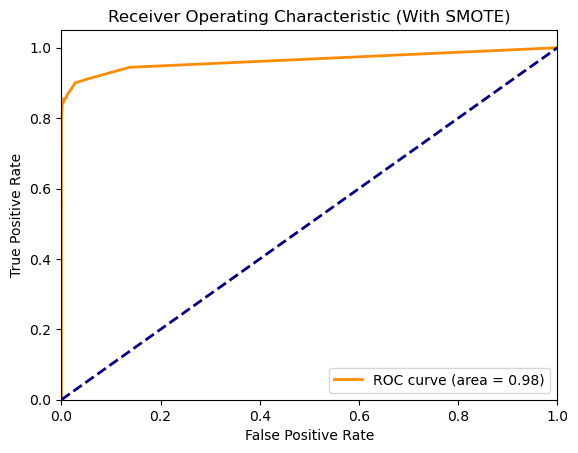

In [49]:
# Model Evaluation Logistic Regression
rf_smote = RandomForestClassifier()
rf_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_predrf_smote = rf_smote.predict(X_test)
y_probarf_smote = rf_smote.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_predrf_smote))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_probarf_smote))

# Plotting ROC AUC Curve for resampled data
fpr_rf_smote, tpr_rf_smote, _ = roc_curve(y_test, y_probarf_smote)
plt.figure()
plt.plot(fpr_rf_smote, tpr_rf_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probalr_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

##### 3.XGBoost Classifier

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.09      0.84      0.17        90

    accuracy                           0.99     56746
   macro avg       0.55      0.92      0.58     56746
weighted avg       1.00      0.99      0.99     56746

ROC AUC Score (With SMOTE): 0.9739325441651763


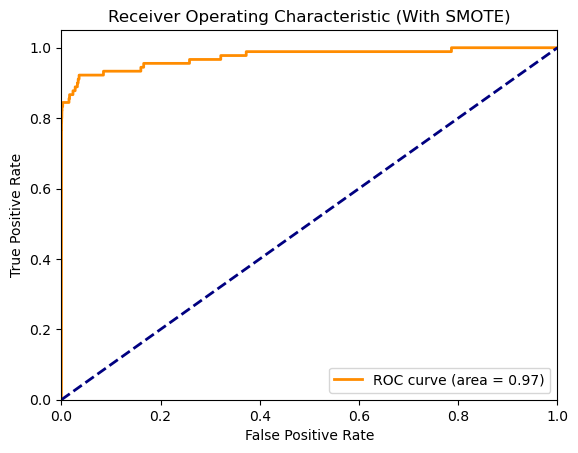

In [50]:
# Model Evaluation with XGBoost Classifier
xgb_smote = XGBClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 100, subsample = 1.0)
xgb_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict test set
y_predxgb_smote = xgb_smote.predict(X_test)
y_probaxgb_smote = xgb_smote.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_predxgb_smote))

# Print ROC AUC Score for resampled data
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_probaxgb_smote))

# Plotting ROC AUC Curve for resampled data
fpr_xgb_smote, tpr_xgb_smote, _ = roc_curve(y_test, y_probaxgb_smote)
plt.figure()
plt.plot(fpr_xgb_smote, tpr_xgb_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_probaxgb_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.show()

### Balanced Random Forest

In [51]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [52]:
# Hyperparameter tuning for Balanced Random Forest Classifier
param_grid_brf = {
    'n_estimators': [100, 200, 500]
}
brf_grid = GridSearchCV(BalancedRandomForestClassifier(), param_grid_brf, scoring = 'roc_auc', cv=5,n_jobs = -1)
brf_grid.fit(X_train, y_train)

print(brf_grid.best_params_)

C:\Users\Souridya\anaconda3\Lib\site-packages\imblearn\utils\fixes.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'n_estimators': 500}


C:\Users\Souridya\anaconda3\Lib\site-packages\imblearn\utils\fixes.py:85: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report (With Balanced Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.87      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC Score (With Balanced Random Forest): 0.9817529378079012


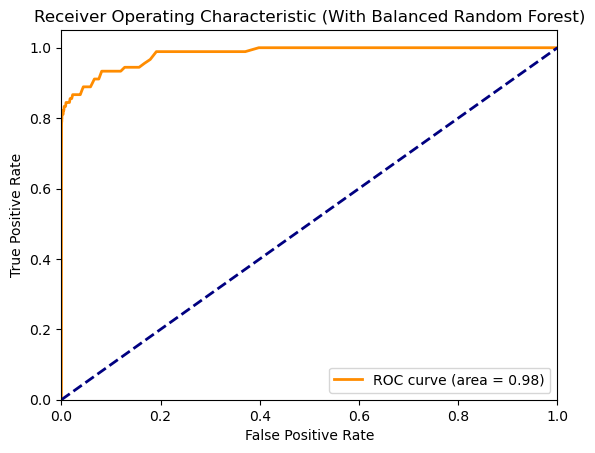

In [53]:
# Model fitting and evaluation
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
# Predict test set
y_pred_brf = brf.predict(X_test)
y_proba_brf = brf.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With Balanced Random Forest):")
print(classification_report(y_test, y_pred_brf))

# Print ROC AUC Score for SMOTE data
print("ROC AUC Score (With Balanced Random Forest):", roc_auc_score(y_test, y_proba_brf))

# Plotting ROC AUC Curve for SMOTE data
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Balanced Random Forest)')
plt.legend(loc="lower right")
plt.show()

### LightGBM

In [54]:
lgbm = LGBMClassifier(objective='binary',  # Since fraud detection is a binary classification problem
                          boosting_type='gbdt',  # Gradient Boosting Decision Tree
                          class_weight='balanced',  # Automatically handle class imbalance
                          random_state=42,  # For reproducibility
                          n_jobs=-1)  # Use all available CPU cores

In [ ]:
# Hyperparamter tuning using LightGBM Classifier
param_grid_lgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1]
}

grid_search_lgb = GridSearchCV(estimator=lgbm, param_grid=param_grid_lgb, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)
grid_search_lgb.fit(X_train, y_train)

print(grid_search_lgb.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# Model fitting and evaluation
lgb = LGBMClassifier(learning_rate = 0.1, n_estimators = 500, random_state=42)
lgb.fit(X_train, y_train)
# Predict test set
y_pred_lgb = lgb.predict(X_test)
y_proba_lgb = lgb.predict_proba(X_test)[:, 1]

# Print classification report for data
print("Classification Report (With Light GBM):")
print(classification_report(y_test, y_pred_lgb))

# Print ROC AUC Score for data
print("ROC AUC Score (With Light GBM):", roc_auc_score(y_test, y_proba_lgb))

# Plotting ROC AUC Curve for data
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_proba_lgb)
plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_lgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Light GBM)')
plt.legend(loc="lower right")
plt.show()